In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_excel('Store Table.xlsx')
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID
0,1,Peoria,Arizona,Region 2,Old,2601.0,48610.0,1
1,2,Midland,Texas,Region 2,Old,2727.0,45689.0,2
2,3,Spokane,Washington,Region 2,Old,2768.0,49554.0,3
3,4,Denton,Texas,Region 2,Old,2759.0,38284.0,4
4,5,Overland Park,Kansas,Region 2,Old,2869.0,59887.0,5


In [6]:
df.tail(3)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID
2012,1297,Wichita Falls,Texas,Region 2,Old,2418.132522,33444.394310,1297
2013,1298,Naperville,Illinois,Region 1,Old,2417.743644,33439.599354,1298
2014,1299,Clovis,California,Region 2,Old,2417.354767,33434.804398,1299


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store ID         2015 non-null   int64  
 1   City             2015 non-null   object 
 2   State            2015 non-null   object 
 3   Sales Region     2015 non-null   object 
 4   New Expansion    2015 non-null   object 
 5   Marketing Spend  2015 non-null   float64
 6   Revenue          2015 non-null   float64
 7   Maket ID         2015 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 126.1+ KB


In [13]:
df.shape

(2015, 8)

In [15]:
df.duplicated().sum()

15

In [111]:
df.drop_duplicates(inplace =True)

In [115]:
df.duplicated().sum()

0

In [29]:
df.isnull().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
Maket ID           0
dtype: int64

In [31]:
df.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
Maket ID           0
dtype: int64

In [43]:
df[['Marketing Spend' , 'Revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing Spend,2000.0,2533.434768,245.965787,1811.0,2335.982102,2525.268336,2711.054671,3984.0
Revenue,2000.0,34866.098830,5049.059427,15562.0,32225.276691,34611.966150,36989.065696,68828.0


<Figure size 800x500 with 0 Axes>

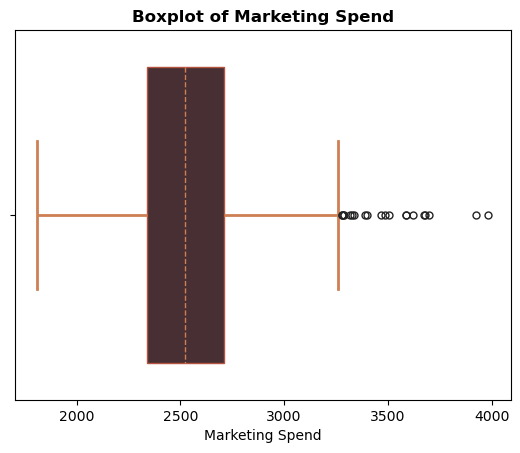

<Figure size 800x500 with 0 Axes>

In [51]:
sns.boxplot(x = 'Marketing Spend' , data = df,
           color='#4B2B31',
           boxprops=dict(edgecolor='#B35340', linewidth=1),
           medianprops=dict(color='#CE8054', linewidth=1, linestyle = '--'), 
           whiskerprops=dict(color='#CE8054', linewidth=2),
           capprops=dict(color='#CE8054', linewidth=2),
           flierprops=dict(marker='.', color='yellow', markersize=10)  
           )
plt.title('Boxplot of Marketing Spend', fontweight = 'bold')
plt.figure(figsize = (8,5))


<Figure size 900x700 with 0 Axes>

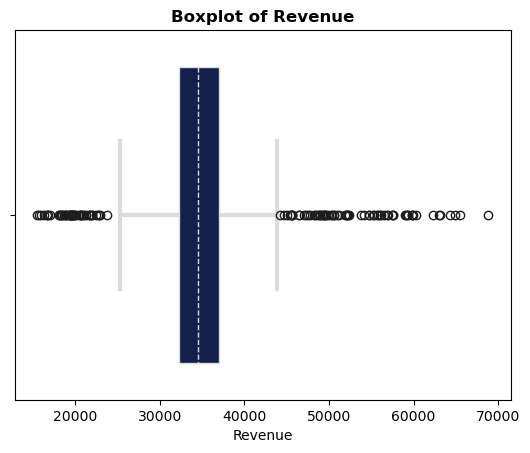

<Figure size 900x700 with 0 Axes>

In [61]:
sns.boxplot(x = 'Revenue', data = df,
            color='#0B1957',
           boxprops=dict(edgecolor='#DBDBDB', linewidth=1),
           medianprops=dict(color='#DBDBDB', linewidth=1, linestyle = '--'), 
           whiskerprops=dict(color='#DBDBDB', linewidth=3),
           capprops=dict(color='#DBDBDB', linewidth=3),
           )
plt.title('Boxplot of Revenue', fontweight = 'bold')
plt.figure(figsize = (9,7))

In [73]:
def detect_outliers (data):
    q1 = np.percentile (data,25)
    q3 = np.percentile (data,75)
    iqr = q3 -q1 
    lower_value = q1 - 1.5* iqr 
    upper_value = q3 - 1.5* iqr 
    outliers = [ x for x in data if x < lower_value or x > upper_value] 
    return outliers

outlier_revenue = detect_outliers(df['Revenue'])
if outlier_revenue:
    print(f'outliers in revene are: {outlier_revenue}')

outliers in revene are: [48610.0, 45689.0, 49554.0, 38284.0, 59887.0, 53827.0, 60338.0, 19569.0, 59840.0, 64906.0, 16860.0, 21988.0, 19888.0, 54701.0, 18471.0, 16690.0, 47729.0, 63027.0, 43183.0, 19120.0, 38178.0, 56836.0, 52114.0, 20123.0, 49856.0, 55790.0, 45017.0, 56921.0, 39744.0, 22972.0, 22680.0, 65475.0, 21718.0, 34829.0, 59283.0, 20057.0, 20455.0, 64302.0, 49506.0, 52250.0, 41313.0, 57625.0, 16029.0, 49191.0, 59870.0, 48254.0, 43397.0, 16372.0, 50233.0, 41460.0, 50364.0, 44223.0, 17006.0, 15562.0, 21824.0, 46490.0, 38782.0, 19350.0, 16652.0, 23764.0, 42803.0, 41110.0, 19448.0, 68828.0, 19529.0, 55684.0, 45418.0, 18297.0, 18966.0, 18838.0, 52078.0, 40545.0, 58951.0, 40921.0, 49609.0, 45550.0, 19563.0, 41361.0, 57530.0, 54768.0, 18754.0, 21286.0, 48796.0, 19708.0, 56089.0, 19752.0, 20949.0, 45666.0, 40779.0, 47482.0, 18215.0, 50650.0, 48933.0, 42026.0, 15735.0, 39856.0, 20669.0, 20541.0, 33647.0, 41319.0, 45632.0, 43773.0, 36821.0, 22824.0, 21953.0, 51229.0, 50583.0, 50895.0, 465

In [75]:
outlier_market = detect_outliers(df['Marketing Spend'])
if outlier_market:
    print(f'outliers in Market Spend are: {outlier_market}')

outliers in Market Spend are: [2601.0, 2727.0, 2768.0, 2759.0, 2869.0, 3080.0, 3110.0, 2593.0, 2675.0, 2984.0, 2541.0, 2651.0, 2895.0, 3466.0, 2686.0, 2795.0, 2737.0, 3085.0, 2894.0, 2765.0, 2521.0, 3077.0, 3287.0, 3679.0, 2918.0, 2420.0, 2557.0, 3620.0, 2483.0, 3131.0, 3083.0, 2808.0, 2984.0, 2484.0, 3335.0, 3127.0, 2904.0, 2318.0, 3488.0, 2886.0, 2373.0, 2758.0, 2607.0, 3146.0, 3399.0, 2790.0, 3220.0, 2344.0, 2939.0, 3082.0, 2338.0, 3246.0, 2374.0, 3129.0, 2939.0, 2642.0, 2871.0, 3392.0, 3228.0, 3175.0, 2874.0, 2792.0, 3924.0, 2440.0, 2950.0, 2462.0, 3084.0, 3177.0, 3003.0, 3697.0, 2857.0, 3168.0, 2943.0, 2777.0, 3329.0, 2854.0, 2555.0, 3162.0, 2928.0, 2275.0, 3285.0, 3217.0, 3115.0, 2779.0, 3277.0, 2745.0, 3984.0, 3262.0, 2718.0, 2552.0, 3072.0, 2676.0, 2553.0, 2685.0, 2990.0, 2805.0, 2846.0, 2699.0, 2901.0, 3015.0, 2160.0, 3079.0, 2962.0, 2830.0, 3228.0, 3005.0, 3020.0, 2947.0, 3131.0, 2901.0, 2926.0, 3086.0, 2754.0, 2282.0, 3319.0, 3081.0, 2542.0, 2527.0, 2967.0, 2357.0, 2838.0, 2

In [77]:
df.head(2)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID
0,1,Peoria,Arizona,Region 2,Old,2601.0,48610.0,1
1,2,Midland,Texas,Region 2,Old,2727.0,45689.0,2


In [79]:
df['Sales Region'].nunique()

2

In [81]:
df['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [83]:
df['New Expansion'].nunique()

2

In [85]:
df['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [91]:
df['New Expansion'].str.capitalize()

0       Old
1       Old
2       Old
3       Old
4       Old
       ... 
2010    Old
2011    Old
2012    Old
2013    Old
2014    Old
Name: New Expansion, Length: 2015, dtype: object

In [93]:
df.shape   

(2015, 8)

In [129]:
correlation = df['Revenue'].corr(df['Marketing Spend'])
print (f'correlation between Revenue & Marketing_Spend is : {correlation}')

correlation between Revenue & Marketing_Spend is : 0.532725271273241


Text(0.5, 1.0, 'correlation between Marketing Spend & Revenue')

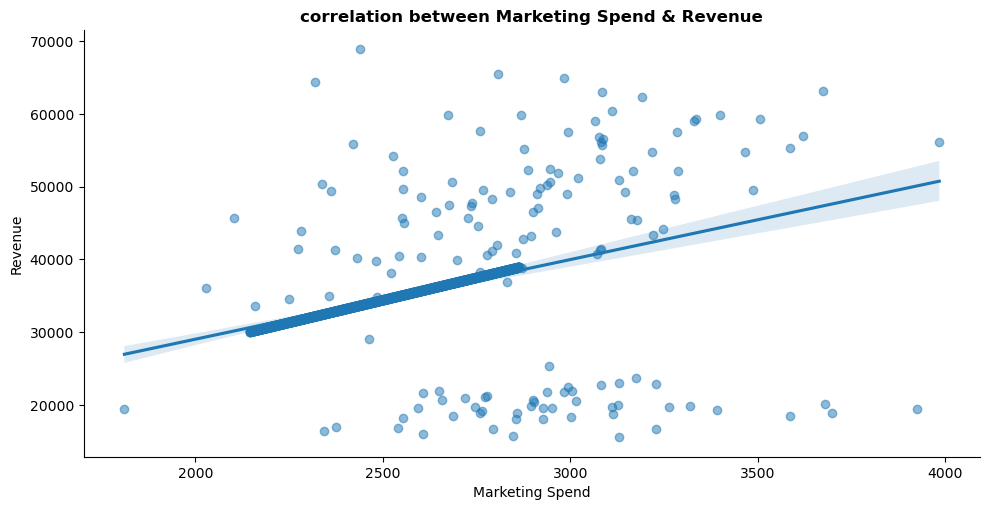

In [145]:
sns.lmplot(x='Marketing Spend', y='Revenue', data=df, aspect=2, scatter_kws={'alpha': 0.5})
plt.title("correlation between Marketing Spend & Revenue", fontweight='bold') 

In [151]:
df['ROI'] = df['Revenue'] - df['Marketing Spend'] / df['Marketing Spend'] 
df.head(2)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID,ROI
0,1,Peoria,Arizona,Region 2,Old,2601.0,48610.0,1,48609.0
1,2,Midland,Texas,Region 2,Old,2727.0,45689.0,2,45688.0


array([[<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Revenue'}>]], dtype=object)

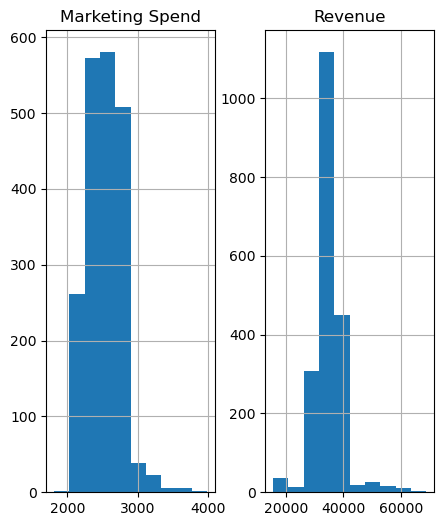

In [165]:
df[['Marketing Spend' , 'Revenue']].hist(figsize = (5,6))